# Inteligência Computacional
## Homework SVM
### Equipe: Seek Learning
 - Danilo Nicioka
 - Micael Cori
 - Michael Costa
 - Pedro Rendeiro

## 1. Considere as SVMs abaixo (Pedro)

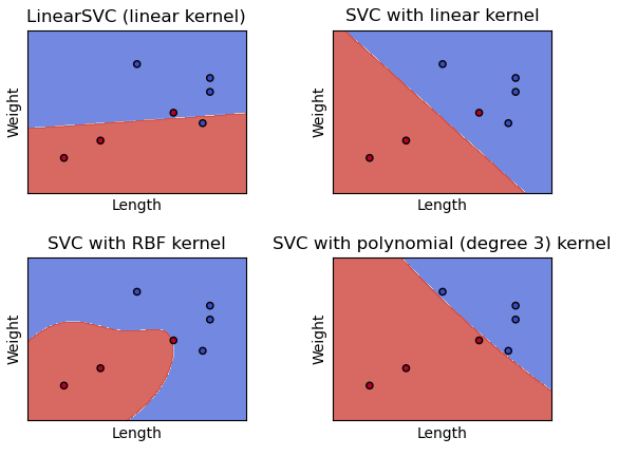

### a) Quantos erros cada SVM possui no conjunto de treino?

 - LinearSVC (linear kernel): 2 erros
 - SVC with linear kernel: 1 erro
 - SVC with RBF kernel: 1 erro
 - SVC with polynomial: 0 erro

### b) Qual a que lhe parece ser a melhor SVM? Por quê?

A SVM do canto superior direito (SVC com kernel linear) parece ser a mais adequada, pois, apesar de ter um erro, possui uma margem maior entre os conjuntos.

## 2. Complexidade (Pedro)
Você quer potencialmente aumentar o número de vetores de suporte, fazendo com que sua nova SVM seja um modelo mais “complexo”. Para isso, você deve aumentar ou diminuir o parâmetro “C” da classe SVC do scikit-learn?

Conforme o valor de "C" aumenta, a complexidade da SVM também aumenta. Portanto, neste caso, seria necessário **aumentar o parâmetro "C"**.

## 3. Custo computacional (Michael)
Um classificador usa vetores de entrada com dimensão **K=5 “features”**. Após treinar uma **SVM linear**, o número de vetores de suporte foi de **450 exemplos (SVs)**. Neste caso, calcular o kernel linear corresponde a um produto interno entre dois vetores de dimensão K=5, cada, o que requer K multiplicações e K-1 adições. **Estime o fator** $ F = C_{original} \div C_{perceptron} $ **de redução do custo computacional da etapa de teste ao converter esta SVM linear para um perceptron**. Assuma que os custos $C_{original}$ e $C_{perceptron}$ correspondem ao número de multiplicações e adições usando-se, respectivamente, a SVM original com os 450 vetores de suporte e após sua conversão para perceptron.

$C_{original} = 450 \times (5+4)$<br>
$C_{perceptron} = (5+4)$<br>
$F = \frac{C_{original}}{C_{perceptron}}$<br>
$F = 450$<br>

## 4. Interpretação do resultado do projeto de SVMs

### Dados
Qntd de vetores de suporte por classe:
 - Classe 0: 1
 - Classe 1: 2

Vetores de suporte:
 - [1, 4]
 - [-2, 3]
 - [-2, -5]
 
Coeficientes duais $(\lambda)$: [-0.5, -0.3, 0.8]

Bias: -2

### a) Função de decisão para essa SVM

Forma geral: $f(z) = (\sum_{n=-0}^{N-1}\lambda_n K(z,x_n)) + b$

Sabendo os valores de $\lambda_n$ e que $b = -2$, $N = 3$ e que a função de kernel linear é $K(z,x_n)\ =\ <z,x_n>$, temos:

$f(z) = (\sum_{n=0}^{2}\lambda_n <z,x_n>) -2$<br>
$f(z) = (-0.5<z,[1,4]> -0.3<z,[-2,3]> +0.8<z,[-2,-5]>) -2$

### b) Função de decisão escrita como Perceptron

Forma geral: $f(z)\ =\ <z,w> +\ b$

Para converter a SVM Linear para a forma de Perceptron, é necessário determinar o **vetor de pesos w**.

$w = \sum_{n=0}^{2}\lambda_n x_n$<br>
$w = -0.5[1,4] -0.3[-2,3] + 0.8[-2,-5]$<br>
$w = [-0.5,-2] + [0.6,-0.9] + [-1.6,-4]$<br>
$w = [-1.5,-6.9]$

Assim, temos:

$f(z)\ =\ <z,[-1.5,-6.9]>\ - 2$

### c) Saída da função de decisão

Vetor de entrada: z = [0,0]<br>
Rótulo predito: $I(f(z) > 0)$  # I - função indicador

$f([0,0])\ =\ <[0,0],[-1.5,-6.9]>\ - 2$<br>
$f([0,0]) = 0 + 0 - 2$<br>
$f([0,0]) = -2$<br>
$y = I(-2 > 0)$<br>
$y = 0$<br>

## 5. Interpretação do resultado de projeto de SVMs
### a) Função de decisão com a fórmula geral para as SVMs 2, 3 e 4.

**SVM 2 - Linear Kernel** - Dados:<br>
Vetores de suporte:
 - [0, -4]
 - [-1, 2]
 - [-2,-2]
 
Coeficientes duais $(\lambda)$: [-0.45994152, -0.27992202, 0.73986354]

Bias: -1.79954513

Fórmula geral: $f(z) = (\sum_{n=-0}^{N-1}\lambda_n K(z,x_n)) + b$

Sabendo que $b = -1.79954513$, que $N = 3$ e que a função de kernel linear é $K(z,x_n)\ =\ <z,x_n>$, temos:

$f(z) = (\sum_{n=0}^{2}\lambda_n <z,x_n>) -1.79954513$<br>

**Função de decisão da SVM 2**<br>
$f(z) = (-0.45994152(<z,[0,-4]>-0.27992202<z,[-1,2]>+0.73986354<z,[-2,-2]>)-1.79954513$

**SVM 3 - RBF Kernel** - Dados:<br>
Vetores de suporte:
- [0, -4]
- [-1, 2]
- [3, 3]
- [-5, -6]
- [-4, -5]
- [-2, -2]
 
Coeficientes duais $(\lambda)$: [-0.91722233, -0.91351914, -0.91300432, 0.87185969, 0.8718861, 1]

Bias: -0.08676121

Gamma: 0.7

Fórmula geral: $f(z) = (\sum_{n=-0}^{N-1}\lambda_n K(z,x_n)) + b$

Sabendo os valores de $\lambda_n$ e que $b = -0.08676121$, $N = 6$, $\gamma = 0.7$ e que a função de kernel rbf é $K(z,x_n)\ =\ e^{-\gamma ||z-x_n||^2}$, temos:

$f(z) = (\sum_{n=0}^{6}\lambda_n e^{-\gamma ||z-x_n||^2})-0.08676121$<br>

**Função de decisão da SVM 3**<br>
$f(z) = ( -0.91722233e^{-0.7||z-[0,-4]||^2}-0.91351914e^{-0.7||z-[-1,2]||^2}-0.91300432e^{-0.7||z-[3, 3]||^2}+0.87185969e^{-0.7||z-[-5,-6]||^2}+0.8718861e^{-0.7||z-[-4,-5]||^2}+e^{-0.7||z-[-2,-2]||^2})-0.08676121$

**SVM 4 - Polynomial Kernel** - Dados:<br>
Vetores de suporte:
- [0, -4]
- [-1, 2]
- [-2, -2]
 
Coeficientes duais $(\lambda)$: [-0.00887134, -0.03133903, 0.04021037]

Bias: -1.03731897

Gamma: 0.5

- $\gamma$ = 1/K; K = 2
- $\gamma$ = 0.5

Degree: 3

Coef0: 0

Fórmula geral: $f(z) = (\sum_{n=-0}^{N-1}\lambda_n K(z,x_n)) + b$

Sabendo os valores de $\lambda_n$ e que $b = -1.03731897$, $N = 6$, $\gamma = 0.5$, d = 3, r = 0 e que a função de kernel polinomial é $K(z,x_n)\ =\ (\lambda_n<z,x_n>+r)^d$, temos:

$f(z) = (\sum_{n=0}^{3}(\lambda_n<z,x_n>)^3)-1.03731897$<br>
$f(z) = (-0.00887134(0.5<z,[0,-4]>)^3-0.03133903(0.5<z,[-1,2]>)^3+0.04021037(0.5<z,[-2,-2]>)^3) - 1.03731897$

**Função de decisão da SVM 4**<br>
$f(z) = (-0.00887134(<z,[0,-2]>)^3-0.03133903(<z,[-0.5,1]>)^3+0.04021037(<z,[-1,-1]>)^3) - 1.03731897$

### b) Expressões para as SVMs 1 e 2 como perceptrons

**SVM 1** - Dados:<br>

Vetor de pesos(w): [-0.68611287, -0.10653139]

Bias: -0.99556119

Fórmula do perceptrom: $f(z) = sgn(<z,w> + b)$

Sabendo os valores do vetor de pesos e que $b = -0.99556119$, temos:

$f(z) = sgn(<z,[-0.68611287, -0.10653139]> - 0.99556119)$

**SVM 2** - Dados:<br>

Vetor de pesos(w): [-1.19980506, -0.19980506]

Bias: -1.79954513

Fórmula do perceptrom: $f(z) = sgn(<z,w> + b)$

Sabendo os valores do vetor de pesos e que $b = -1.79954513$, temos:

$f(z) = sgn(<z,[-1.19980506, -0.19980506]> - 1.79954513)$

### c) SVM 2 - Linear para Perceptron e Custo Computacional

Como foi obtido no item a), a função de decisão da SVM2 a partir da fórmula geral é:

$f(z) = (-0.45994152(<z,[0,-4]>-0.27992202<z,[-1,2]>+0.73986354<z,[-2,-2]>)-1.79954513$

Pode-se desenvolver essa expressão para obter a função como perceptron:
$f(z) = (-0.45994152(<z,[0,-4]>-0.27992202<z,[-1,2]>+0.73986354<z,[-2,-2]>)-1.79954513$<br>
$f(z) = (-0.45994152(-4z_1)-0.27992202(-z_1+2z_2)+0.73986354(-2z_1-2z_2)) - 1.79954513$<br>
$f(z) = ( 1.83976608z_2 + 0.27992202z_1 - 0.55984404z_2 - 1.479727082z_1- 1.47972708z_2 ) - 1.79954513$<br>
$f(z) = ( - 1.1998050619999998z_1 - 0.19980504z_2 ) - 1.79954513$<br>
$f(z) = <z,[-1.1998050619999998,-0.19980504]> - 1.79954513$

In [7]:
print("Resultados dos produtos internos = ",[0.45994152*4,-0.27992202*2,0.73986354*2])
print("w =",[0.27992202-1.479727082,1.83976608-0.55984404-1.47972708])

Resultados dos produtos internos =  [1.83976608, -0.55984404, 1.47972708]
w = [-1.1998050619999998, -0.19980504]


Como foi calculado na questão 3, o custo computacional da SVM linear e do Perceptron podem ser obtidas por meio das seguintes relações:
- SVM Linear: $NSV \times 2K + 1$
- Perceptron: $2K$

A partir disso, dados K = 2 e NSV = 3, obtém-se os seguintes custos:

SVM Linear: $3 \times 2 \times 2 + 1 = 13$

Perceptron: $2 \times 2 = 4$

Portanto, pode-se notar que houve uma economida de 13-4=**9 operações**

### d.1) Número total de vetores de suporte das SVMs 3 e 4

Na SVM 3, são utilizados 6 vetores de suporte, 3 de cada classe.

Na SVM 4, são utilizados 3 vetores de suporte, 2 da classe 0 e 1 da classe 1.

### d.2) Índices dos vetores de suporte e os respectivos valores dos coeficientes duais

Para a SVM3, temos:

| Índices    |  Lambda    |
| :---: | :---: |
| 0  | -0.91722233  |
| 1  | -0.91351914  |
| 2  | -0.91300432  |
| 3  | 0.87185969  |
| 4  | 0.8718861  |
| 5  | 1  |

Para a SVM4, temos:

| Índices    |  Lambda    |
| :---: | :---: |
| 0  | -0.00887134  |
| 1  | -0.03133903  |
| 5  | 0.04021037  |

### d.3) Bias

Na SVM 3, b = -0.08676121

Na SVM 4, b = -1.03731897

### e) Confidence Scores e Classe

Dados:
Confidence Scores = [-1.00027976, -1.00027976, -0.99977173, 1.00010297, 1.00022828, 0.90993821]

Quanto maior a distância entre o score e 0, maior a confiança da SVM, pois fica mais distante do limiar. Logo, para verificar qual dos exemplos a SVM está menos confiante, basta pegar qual valor está mais próximo de 0. <br>
A partir disso, pode-se notar que a score 0.90993821 do **exemplo 5** é a que a SVM está menos confiante e prediz a **classe 1** 

## 6. ... (Micael)

In [3]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# define the pipeline and the classifier
clf_kernel_linear = make_pipeline(
    StandardScaler(),
    SVC(kernel="linear", C=1, shrinking=False),
    verbose=True,
)

print("LINEAR KERNEL SVM")


def train_and_score_kernel_linear(data: np.ndarray, data_name=""):
    my_data = data
    X = my_data[:, :2]  # first 2 columns of data
    y = np.ravel(my_data[:, 2:], order="C")
    # Make a pipeline that normalizes data and fit with linear kernel SVC
    # StandardScaler make the mean 0 and unit variance

    clf_kernel_linear.fit(X, y)
    print(data_name, " - Score: ", clf_kernel_linear.score(X, y), end="/n")


def test_and_score_kernel_linear(data: np.ndarray, data_name=""):
    my_data = data
    X = my_data[:, :2]  # first 2 columns of data
    y = np.ravel(my_data[:, 2:], order="C")

    data_with_pred = (
        pd.DataFrame(
            data=clf_kernel_linear.get_params()["standardscaler"].transform(X),
            columns=["x1", "x2"],
        )
        .join(pd.DataFrame({"y": y}))
        .join(pd.DataFrame({"y_pred": clf_kernel_linear.predict(X)}))
    )
    print(f"{data_name} with predictions: \n", data_with_pred)

    print("Score: ", clf_kernel_linear.score(X, y), end="/n")


# 1
train_and_score_kernel_linear(
    np.genfromtxt("./datasets/dataset_train.txt", delimiter=","), "Dataset Train"
)
# 2
test_and_score_kernel_linear(
    np.genfromtxt("./datasets/dataset_test.txt", delimiter=","), "Dataset Test"
)


# 3
print("PERCEPTRON IMPLEMENTATION (LinearSVC)")
# define the pipeline and the classifier
clf_perceptron = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1),
    verbose=True,
)


def train_and_score_perceptron_svc(data, data_name=""):
    my_data = data
    X = my_data[:, :2]  # first 2 columns of data
    y = np.ravel(my_data[:, 2:], order="C")
    # Make a pipeline that normalizes data and fit with LinearSVC
    # StandardScaler make the mean 0 and unit variance

    clf_perceptron.fit(X, y)
    print(data_name, " - Score: ", clf_perceptron.score(X, y), end="/n")


def test_and_score_perceptron_svc(data: np.ndarray, data_name=""):
    my_data = data
    X = my_data[:, :2]  # first 2 columns of data
    y = np.ravel(my_data[:, 2:], order="C")

    data_with_pred = (
        pd.DataFrame(
            data=clf_perceptron.get_params()["standardscaler"].transform(X),
            columns=["x1", "x2"],
        )
        .join(pd.DataFrame({"y": y}))
        .join(pd.DataFrame({"y_pred": clf_perceptron.predict(X)}))
    )
    print(f"{data_name} with predictions: \n", data_with_pred)

    print("Score: ", clf_perceptron.score(X, y), end="/n")


train_and_score_perceptron_svc(
    data=np.genfromtxt("./datasets/dataset_train.txt", delimiter=","),
    data_name="Train data with perceptron",
)
test_and_score_perceptron_svc(
    data=np.genfromtxt("./datasets/dataset_test.txt", delimiter=","),
    data_name="Test data with perceptron",
)


LINEAR KERNEL SVM
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s
Dataset Train  - Score:  0.8333333333333334/nDataset Test with predictions: 
          x1       x2    y  y_pred
0  0.950586  0.00000  0.0     0.0
1  0.190117  0.58554  0.0     0.0
2 -1.711055  0.00000  1.0     1.0
3 -1.330821  0.00000  1.0     1.0
Score:  1.0/nPERCEPTRON IMPLEMENTATION (LinearSVC)
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing linearsvc, total=   0.0s
Train data with perceptron  - Score:  1.0/nTest data with perceptron with predictions: 
          x1       x2    y  y_pred
0  0.950586  0.00000  0.0     0.0
1  0.190117  0.58554  0.0     0.0
2 -1.711055  0.00000  1.0     1.0
3 -1.330821  0.00000  1.0     1.0
Score:  1.0/n

## 7. ... (Pedro)